In [35]:
from hmmlearn import hmm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dimensiunea gridului
dimensiune_grid = (10, 10)

# Lista de culori predefinite
culori = [
    "red", "blue", "green", "yellow",
    "purple", "orange", "pink", "cyan",
    "brown", "lime"
]

# Citirea gridului
df = pd.read_csv('grid_culori.csv', header=None)
grid_culori = df.to_numpy()

# Generarea secvenței de culori observate
observatii = ['red', 'red', 'lime', 'yellow', 'blue']

# Mapare culori -> indecși
culoare_to_idx = {culoare: idx for idx, culoare in enumerate(culori)}
idx_to_culoare = {idx: culoare for culoare, idx in culoare_to_idx.items()}

# Transformăm secvența de observații în indecși
observatii_idx = [culoare_to_idx[c] for c in observatii]

# Definim stările ascunse ca fiind toate pozițiile din grid (100 de stări)
numar_stari = dimensiune_grid[0] * dimensiune_grid[1]
stari_ascunse = [(i, j) for i in range(dimensiune_grid[0]) for j in range(dimensiune_grid[1])]
stare_to_idx = {stare: idx for idx, stare in enumerate(stari_ascunse)}
idx_to_stare = {idx: stare for stare, idx in stare_to_idx.items()}

# Matrice de tranziție
transitions = np.zeros((numar_stari, numar_stari))
for i, j in stari_ascunse:
    vecini = [
        (i - 1, j), (i + 1, j), (i, j - 1), (i, j + 1), (i, j)  # sus, jos, stânga, dreapta, staționare
    ]
    vecini_valizi = [stare_to_idx[(x, y)] for x, y in vecini if 0 <= x < 10 and 0 <= y < 10]
    for vecin in vecini_valizi:
        transitions[stare_to_idx[(i, j)], vecin] = 1 / len(vecini_valizi)

# Matrice de emisie
emissions = np.zeros((numar_stari, len(culori)))
for (i, j), idx in stare_to_idx.items():
    emissions[idx, culoare_to_idx[grid_culori[i, j]]] = 1

# Modelul HMM
model = hmm.MultinomialHMM(n_components=numar_stari, n_iter=100)

# Probabilitățile de start (uniforme)
model.startprob_ = np.ones(numar_stari) / numar_stari

# Matricea de tranziție
model.transmat_ = transitions

# Matricea de emisie
model.emissionprob_ = emissions

# Rulăm algoritmul Viterbi pentru secvența de observații
observatii_idx = np.array(observatii_idx).reshape(-1, 1)
logprob, secventa_stari = model.decode(observatii_idx, algorithm="viterbi")

# Convertim secvența de stări în poziții din grid
drum = [idx_to_stare[idx] for idx in secventa_stari]

# Vizualizăm drumul pe grid
fig, ax = plt.subplots(figsize=(8, 8))
for i in range(dimensiune_grid[0]):
    for j in range(dimensiune_grid[1]):
        culoare = grid_culori[i, j]
        ax.add_patch(plt.Rectangle((j, dimensiune_grid[0] - i - 1), 1, 1, color=culoare))
        ax.text(j + 0.5, dimensiune_grid[0] - i - 0.5, culoare,
                color="white", ha="center", va="center", fontsize=8, fontweight="bold")

# Evidențiem drumul rezultat
for idx, (i, j) in enumerate(drum):
    ax.add_patch(plt.Circle((j + 0.5, dimensiune_grid[0] - i - 0.5), 0.3, color="black", alpha=0.7))
    ax.text(j + 0.5, dimensiune_grid[0] - i - 0.5, str(idx + 1),
            color="white", ha="center", va="center", fontsize=10, fontweight="bold")

# Setări axă
ax.set_xlim(0, dimensiune_grid[1])
ax.set_ylim(0, dimensiune_grid[0])
ax.set_xticks(range(dimensiune_grid[1]))
ax.set_yticks(range(dimensiune_grid[0]))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(visible=True, color="black", linewidth=0.5)
ax.set_aspect("equal")
plt.title("Drumul rezultat al stărilor ascunse", fontsize=14)
plt.show()

# Analizăm fără mișcare la stânga
transitions_no_left = np.copy(transitions)
for i, j in stari_ascunse:
    if (i, j - 1) in stari_ascunse:
        transitions_no_left[stare_to_idx[(i, j)], stare_to_idx[(i, j - 1)]] = 0
    transitions_no_left[stare_to_idx[(i, j)]] /= transitions_no_left[stare_to_idx[(i, j)]].sum()

model.transmat_ = transitions_no_left
logprob_no_left, secventa_stari_no_left = model.decode(np.array(observatii_idx).reshape(-1, 1), algorithm="viterbi")
drum_no_left = [idx_to_stare[idx] for idx in secventa_stari_no_left]

print("Drumul cel mai probabil fara miscare la stanga:", drum_no_left)
print("Probabilitatea drumului fara miscare la stanga:", np.exp(logprob_no_left))

https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


ValueError: n_trials must be set

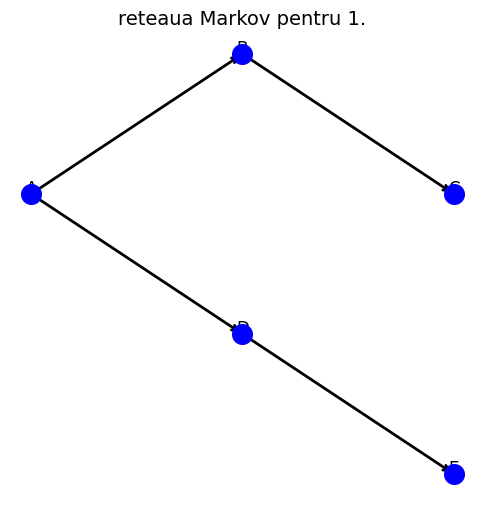

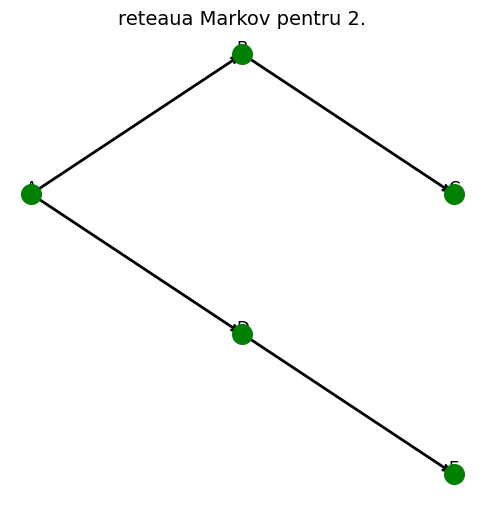

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# P(A, B, C, D, E) = 1/k * phi(A, B, C) * phi(A, D) * phi(D, E)
def retea_markov_1():
#definirea nodurilor
    fig, ax = plt.subplots(figsize=(6, 6))

    ax.scatter([1, 2, 3, 2, 3], [4, 5, 4, 3, 2], s=200, c='blue', zorder=10)

#etichete noduri
    ax.text(1, 4, 'A', ha='center', fontsize=12)
    ax.text(2, 5, 'B', ha='center', fontsize=12)
    ax.text(3, 4, 'C', ha='center', fontsize=12)
    ax.text(2, 3, 'D', ha='center', fontsize=12)
    ax.text(3, 2, 'E', ha='center', fontsize=12)

#arce
    ax.annotate('', xy=(2, 5), xytext=(1, 4), arrowprops=dict(arrowstyle='->', color='black', lw=2))
    ax.annotate('', xy=(3, 4), xytext=(2, 5), arrowprops=dict(arrowstyle='->', color='black', lw=2))
    ax.annotate('', xy=(2, 3), xytext=(1, 4), arrowprops=dict(arrowstyle='->', color='black', lw=2))
    ax.annotate('', xy=(3, 2), xytext=(2, 3), arrowprops=dict(arrowstyle='->', color='black', lw=2))

    ax.axis('off')
    plt.title("reteaua Markov pentru 1.", fontsize=14)
    plt.show()

# P(A, B, C, D, E) = 1/k * phi(A, B) * phi(B, D) * phi(B, C) * Phi(B, E)
def retea_markov_2():
#noduri
    fig, ax = plt.subplots(figsize=(6, 6))

    ax.scatter([1, 2, 3, 2, 3], [4, 5, 4, 3, 2], s=200, c='green', zorder=10)

#etichete noduri
    ax.text(1, 4, 'A', ha='center', fontsize=12)
    ax.text(2, 5, 'B', ha='center', fontsize=12)
    ax.text(3, 4, 'C', ha='center', fontsize=12)
    ax.text(2, 3, 'D', ha='center', fontsize=12)
    ax.text(3, 2, 'E', ha='center', fontsize=12)

#arce
    ax.annotate('', xy=(2, 5), xytext=(1, 4), arrowprops=dict(arrowstyle='->', color='black', lw=2))
    ax.annotate('', xy=(3, 4), xytext=(2, 5), arrowprops=dict(arrowstyle='->', color='black', lw=2))
    ax.annotate('', xy=(2, 3), xytext=(1, 4), arrowprops=dict(arrowstyle='->', color='black', lw=2))
    ax.annotate('', xy=(3, 2), xytext=(2, 3), arrowprops=dict(arrowstyle='->', color='black', lw=2))

    ax.axis('off')
    plt.title("reteaua Markov pentru 2.", fontsize=14)
    plt.show()


retea_markov_1()
retea_markov_2()

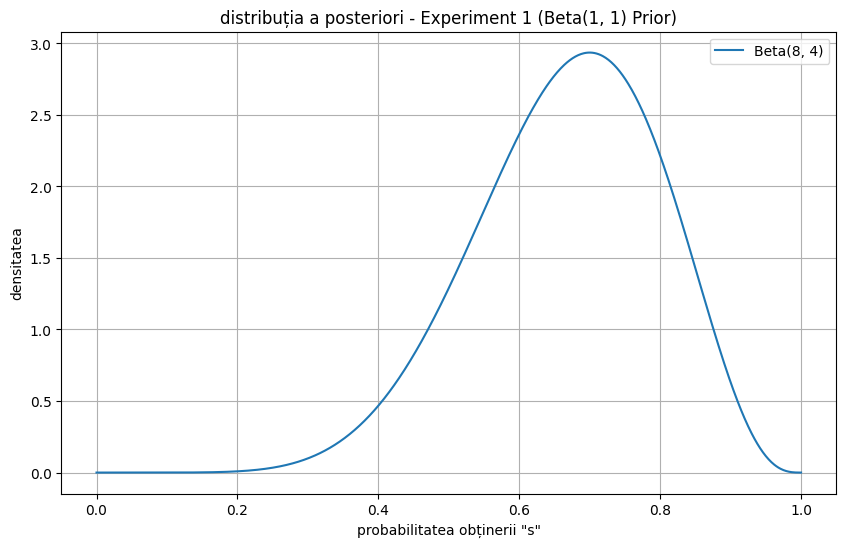

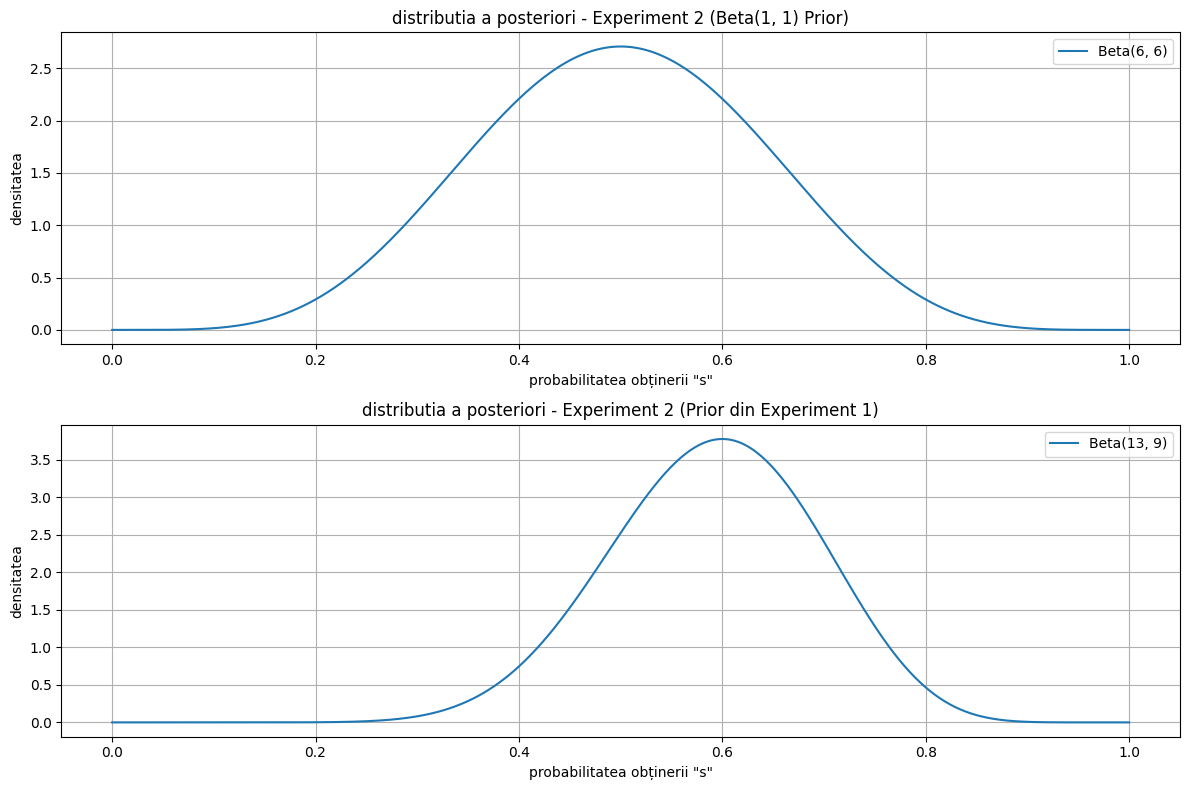

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

#plota distributiile Beta
def plot_beta_distribution(alpha, beta_value, title):
    x = np.linspace(0, 1, 1000)
    y = beta.pdf(x, alpha, beta_value)
    plt.plot(x, y, label=f'Beta({alpha}, {beta_value})')
    plt.title(title)
    plt.xlabel('probabilitatea obținerii "s"')
    plt.ylabel('densitatea')
    plt.legend()
    plt.grid(True)

#aruncari initiale
data_1 = ['s', 's', 'b', 'b', 's', 's', 's', 's', 'b', 's']
#numarul de succesuri si insuccesuri
s_count_1 = data_1.count('s')
b_count_1 = data_1.count('b')

#distributia a priori Beta(1, 1)
alpha_prior = 1
beta_prior = 1

#distributia a posteriori pentru primul set de aruncari (cu prior Beta(1, 1))
alpha_post_1 = alpha_prior + s_count_1
beta_post_1 = beta_prior + b_count_1

#plot distributia a posteriori
plt.figure(figsize=(10, 6))
plot_beta_distribution(alpha_post_1, beta_post_1, 'distribuția a posteriori - Experiment 1 (Beta(1, 1) Prior)')
plt.show()

#aruncarile experimentului 2
data_2 = ['b', 'b', 's', 'b', 's', 's', 'b', 's', 's', 'b']
#numarul de succesuri si insuccesuri
s_count_2 = data_2.count('s')
b_count_2 = data_2.count('b')

#distributia a posteriori pentru cazul 1 (Beta(1, 1) prior)
alpha_post_2_1 = alpha_prior + s_count_2
beta_post_2_1 = beta_prior + b_count_2

#distributia a posteriori pentru cazul 2 (folosind posteriorul anterior ca prior)
alpha_prior_2 = alpha_post_1
beta_prior_2 = beta_post_1

alpha_post_2_2 = alpha_prior_2 + s_count_2
beta_post_2_2 = beta_prior_2 + b_count_2

#plot distributiile a posteriori pentru ambele cazuri
plt.figure(figsize=(12, 8))

#cazul 1: prior Beta(1, 1)
plt.subplot(2, 1, 1)
plot_beta_distribution(alpha_post_2_1, beta_post_2_1, 'distributia a posteriori - Experiment 2 (Beta(1, 1) Prior)')
plt.tight_layout()

#cazul 2: prior din posteriorul experimentului 1
plt.subplot(2, 1, 2)
plot_beta_distribution(alpha_post_2_2, beta_post_2_2, 'distributia a posteriori - Experiment 2 (Prior din Experiment 1)')
plt.tight_layout()

plt.show()